In [2]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', 20)
import calendar

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:

data_path = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results'
save_path = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\maps' 

os.makedirs(save_path, exist_ok=True)
os.makedirs(os.path.join(save_path, 'place_plots'), exist_ok=True)




years = [2022]
months = list(range(1, 13))

landscan_daytime_fname =   r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Landscan_daytime_2021_CBG.csv"
landscan_nighttime_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Landscan_nighttime_2021_CBG.csv"

# hourly_popu_fname = fr"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"
ACS_file = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
CBG_place_fname = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\CBG_place.gpkg'

# desktop 2018
# landscan_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\Landscan_daytime_2021_CBG.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\adjusted_negative_hourly_population\CBG_population_hourly_{year}{month:02}.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"

CBG_2019_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\blockgroups2019.zip"


landscan_day_df = pd.read_csv(landscan_daytime_fname, dtype={"GEOID":str}, usecols=['GEOID', 'SUM']).rename(columns={"SUM": "landscan_day", "GEOID":"CBG"}).set_index("CBG").astype(int)
landscan_night_df = pd.read_csv(landscan_nighttime_fname, dtype={"GEOID":str}, usecols=['GEOID', 'SUM']).rename(columns={"SUM": "landscan_night", "GEOID":"CBG"}).set_index("CBG").astype(int)

ACS_df = pd.read_csv(ACS_file, dtype={'fips':str}).iloc[:, :2].rename(columns={"fips": "CBG"}).set_index("CBG").astype(int)
ACS_df = ACS_df.merge(landscan_day_df, left_index=True, right_index=True).merge(landscan_night_df, left_index=True, right_index=True)
ACS_df

,totalpopulation,landscan_day,landscan_night
CBG,,,
010010201001,730,392,580
010010201002,1263,436,1194
010010202001,835,1622,904
010010202002,1124,2566,1116
010010203001,2774,974,2254
...,...,...,...
560459511001,1450,951,1408
560459511002,1844,956,1798
560459513001,1314,803,1041


In [9]:
CBG_place_gdf = gpd.read_file(CBG_place_fname)
CBG_place_gdf

,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry
0,0.991480,010730059033,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.69174 33.60098, -86.69159 ..."
1,0.953754,010730059031,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.68297 33.59476, -86.68294 ..."
2,0.945075,010730059053,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.70047 33.61792, -86.70042 ..."
3,1.000000,010730059051,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.71176 33.59397, -86.71124 ..."
4,1.000000,010730057023,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.88307 33.47244, -86.88301 ..."
...,...,...,...,...,...,...,...,...
147916,0.938016,720133001023,7203024,Animas,Animas comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-66.63968 18.44907, -66.63827 ..."
147917,0.623047,720133001024,7203024,Animas,Animas comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-66.64058 18.44481, -66.63923 ..."
147918,0.959056,720959514003,7226502,Emajagua,Emajagua comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-65.8927 17.99878, -65.8925 17..."
147919,0.968009,720959514005,7226502,Emajagua,Emajagua comunidad,PR,Puerto Rico,"MULTIPOLYGON (((-65.88323 18.005, -65.88257 18..."


In [15]:
df_list = []
for year in years:
    for month in months:
        hourly_popu_fname = fr"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_{year}{month:02}.csv"
        print(hourly_popu_fname)
        df = pd.read_csv(hourly_popu_fname, dtype={'CBG':str}).set_index('CBG').astype(int)
        df_list.append(df)
        
all_df = pd.concat(df_list, axis=1)
df_list = []
# all_df

D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202201.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202202.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202203.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202204.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202205.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202206.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202207.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202208.csv
D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_pop

In [16]:
hourly_index = pd.date_range(start='2022-01-01', end='2022-12-31 23:00:00', freq='H')
all_df.index = all_df.index.str.zfill(12)
all_df.columns = hourly_index 
all_df

C:\tmp\ipykernel_23488\3205075733.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start='2022-01-01', end='2022-12-31 23:00:00', freq='H')


,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00,2022-01-01 05:00:00,2022-01-01 06:00:00,2022-01-01 07:00:00,2022-01-01 08:00:00,2022-01-01 09:00:00,...,2022-12-31 14:00:00,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
CBG,,,,,,,,,,,,,,,,,,,,,
010010201001,832.0,437.0,517.0,592.0,648.0,675.0,641.0,677.0,590.0,582.0,...,409.0,193.0,633.0,672.0,949.0,691.0,1200.0,1432.0,1361.0,1141.0
010010201002,2197.0,1840.0,2120.0,2063.0,2205.0,2199.0,1742.0,1544.0,1189.0,1049.0,...,800.0,1000.0,1378.0,1861.0,2065.0,2173.0,2155.0,1877.0,1770.0,1726.0
010010202001,983.0,615.0,684.0,750.0,768.0,822.0,758.0,767.0,748.0,601.0,...,61.0,436.0,436.0,183.0,321.0,523.0,587.0,416.0,446.0,773.0
010010202002,1417.0,1115.0,1123.0,1003.0,981.0,1139.0,1041.0,1196.0,1403.0,1121.0,...,858.0,1237.0,1421.0,2381.0,2246.0,2337.0,2187.0,1557.0,1084.0,1573.0
010010203001,2927.0,2979.0,3243.0,3676.0,3151.0,2916.0,2870.0,2811.0,2691.0,2629.0,...,1380.0,1696.0,2240.0,2764.0,2961.0,3390.0,3206.0,2861.0,2371.0,2643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320030026051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361199830001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511959312003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-44.0,-77.0,-70.0,-62.0,-44.0,-5.0,39.0,81.0,119.0,165.0


In [17]:
CBG_place_hourly_gdf = CBG_place_gdf.merge(ACS_df, right_index=True,  left_on='CBG').merge(all_df, right_index=True, left_on='CBG')
CBG_place_hourly_gdf
# CBG_place_hourly_gdf

,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry,totalpopulation,landscan_day,...,2022-12-31 14:00:00,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
0,0.991480,010730059033,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.69174 33.60098, -86.69159 ...",1991,1060,...,527.0,742.0,690.0,892.0,1091.0,1080.0,1551.0,949.0,1211.0,1551.0
1,0.953754,010730059031,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.68297 33.59476, -86.68294 ...",2187,1508,...,814.0,605.0,765.0,878.0,1374.0,1749.0,1680.0,1432.0,1512.0,1734.0
2,0.945075,010730059053,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.70047 33.61792, -86.70042 ...",2741,1134,...,1460.0,1997.0,2027.0,2515.0,2232.0,2364.0,2386.0,3106.0,3024.0,2725.0
3,1.000000,010730059051,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.71176 33.59397, -86.71124 ...",1213,1250,...,1165.0,1389.0,1212.0,1086.0,1544.0,878.0,844.0,1218.0,805.0,1118.0
4,1.000000,010730057023,0107000,Birmingham,Birmingham city,AL,Alabama,"MULTIPOLYGON (((-86.88307 33.47244, -86.88301 ...",412,234,...,457.0,557.0,723.0,864.0,686.0,465.0,482.0,859.0,636.0,555.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146448,0.989965,560210004012,5671800,South Greeley,South Greeley CDP,WY,Wyoming,"MULTIPOLYGON (((-104.82115 41.08882, -104.8208...",597,691,...,269.0,40.0,55.0,133.0,-23.0,119.0,204.0,223.0,427.0,455.0
146449,0.962990,560210004013,5629300,Fox Farm-College,Fox Farm-College CDP,WY,Wyoming,"MULTIPOLYGON (((-104.78868 41.10225, -104.7884...",680,282,...,-207.0,41.0,94.0,-12.0,-150.0,27.0,121.0,370.0,355.0,489.0
146450,0.899414,560210004022,5629300,Fox Farm-College,Fox Farm-College CDP,WY,Wyoming,"MULTIPOLYGON (((-104.80266 41.11944, -104.8038...",2884,1222,...,275.0,28.0,302.0,640.0,776.0,793.0,918.0,1157.0,1809.0,2289.0
146451,1.000000,560319594006,5683040,Wheatland,Wheatland town,WY,Wyoming,"MULTIPOLYGON (((-104.96564 42.05622, -104.9655...",842,1540,...,1079.0,546.0,664.0,1206.0,1095.0,844.0,776.0,671.0,807.0,885.0


In [18]:
CBG_place_hourly_gdf['NAMELSAD'].nunique()

10401

In [19]:
# df = CBG_place_hourly_gdf.query('NAME == "Myrtle Beach" ')
# df = CBG_place_hourly_gdf.query('NAME == "Ocean City" and STUSPS == "MD" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Miami Beach city')]
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Miami Beach city" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Daytona Beach city')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Port Aransas')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Capitola')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('St. Augustine')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Cape May')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('San Clemente')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Newport')].query('STATE_NAME == "Rhode Island" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Solana Beach')] 
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Provincetown')]#.query('STATE_NAME == "Rhode Island" ')
# df = CBG_place_hourly_gdf.query('NAME == "State College" ')
# df = CBG_place_hourly_gdf.query('NAME == "Columbia" ').query('STUSPS == "SC" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Holden Beach town')]
df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['CBG'].str.startswith('36061')]  # manhattan

df

,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry,totalpopulation,landscan_day,...,2022-12-31 14:00:00,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
90320,1.0,360610078001,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.97497 40.7485, -73.97359 4...",1627,2266,...,1935.0,1586.0,1594.0,1602.0,1968.0,1663.0,2143.0,1668.0,1795.0,1672.0
90374,1.0,360610050004,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.98829 40.73466, -73.98782 ...",919,2595,...,1296.0,1195.0,1399.0,807.0,1017.0,1040.0,1365.0,1092.0,1116.0,846.0
90375,1.0,360610044007,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.98156 40.73264, -73.98084 ...",3098,940,...,2239.0,2437.0,2167.0,1897.0,2219.0,2776.0,2833.0,3091.0,2489.0,2460.0
90376,1.0,360610063004,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.99902 40.73415, -73.99862 ...",1004,1253,...,972.0,970.0,1265.0,990.0,1016.0,976.0,1322.0,1096.0,960.0,930.0
90377,1.0,360610064005,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.9785 40.73679, -73.97891 4...",1664,748,...,1445.0,1933.0,1555.0,1375.0,1514.0,1996.0,2684.0,1695.0,1880.0,1492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96358,1.0,360610136001,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95034 40.77556, -73.94982 ...",2455,1488,...,1564.0,2244.0,1487.0,1517.0,1887.0,2245.0,2029.0,2005.0,1966.0,1960.0
96359,1.0,360610136002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95126 40.77429, -73.95078 ...",1232,1383,...,993.0,1466.0,1484.0,1120.0,1070.0,1074.0,1564.0,2147.0,1958.0,1692.0
96360,1.0,360610137002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.9767 40.765, -73.9772 40.7...",450,4120,...,4359.0,3757.0,2558.0,2735.0,4205.0,3026.0,3052.0,2390.0,3014.0,1323.0
96361,1.0,360610138002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95363 40.77529, -73.95409 ...",2332,554,...,819.0,1591.0,1235.0,1367.0,1941.0,1346.0,1844.0,1945.0,2127.0,1956.0


<Axes: >

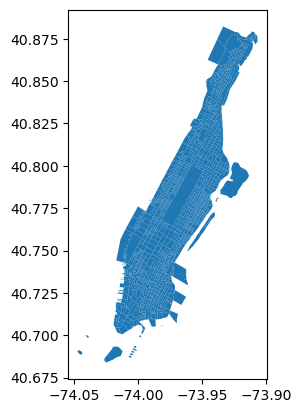

In [23]:
df[['CBG', 'geometry']].explore()
df.plot()

In [24]:
sum_series = df.iloc[:, 8:].sum()

ACS_popu = sum_series.iloc[0]
LandScan_day_popu = sum_series.iloc[1]
LandScan_night_popu = sum_series.iloc[2]

place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

mini_popu_ratio = 0.1
sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

In [25]:
df['mini_popu'] = df['totalpopulation'] * 0.1
df

c:\Users\hning6\AppData\Local\anaconda3\envs\geo\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry,totalpopulation,landscan_day,...,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00,mini_popu
90320,1.0,360610078001,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.97497 40.7485, -73.97359 4...",1627,2266,...,1586.0,1594.0,1602.0,1968.0,1663.0,2143.0,1668.0,1795.0,1672.0,162.7
90374,1.0,360610050004,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.98829 40.73466, -73.98782 ...",919,2595,...,1195.0,1399.0,807.0,1017.0,1040.0,1365.0,1092.0,1116.0,846.0,91.9
90375,1.0,360610044007,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.98156 40.73264, -73.98084 ...",3098,940,...,2437.0,2167.0,1897.0,2219.0,2776.0,2833.0,3091.0,2489.0,2460.0,309.8
90376,1.0,360610063004,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.99902 40.73415, -73.99862 ...",1004,1253,...,970.0,1265.0,990.0,1016.0,976.0,1322.0,1096.0,960.0,930.0,100.4
90377,1.0,360610064005,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.9785 40.73679, -73.97891 4...",1664,748,...,1933.0,1555.0,1375.0,1514.0,1996.0,2684.0,1695.0,1880.0,1492.0,166.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96358,1.0,360610136001,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95034 40.77556, -73.94982 ...",2455,1488,...,2244.0,1487.0,1517.0,1887.0,2245.0,2029.0,2005.0,1966.0,1960.0,245.5
96359,1.0,360610136002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95126 40.77429, -73.95078 ...",1232,1383,...,1466.0,1484.0,1120.0,1070.0,1074.0,1564.0,2147.0,1958.0,1692.0,123.2
96360,1.0,360610137002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.9767 40.765, -73.9772 40.7...",450,4120,...,3757.0,2558.0,2735.0,4205.0,3026.0,3052.0,2390.0,3014.0,1323.0,45.0
96361,1.0,360610138002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95363 40.77529, -73.95409 ...",2332,554,...,1591.0,1235.0,1367.0,1941.0,1346.0,1844.0,1945.0,2127.0,1956.0,233.2


In [ ]:
hourly_popu_df = df.iloc[:, 11:]
hourly_popu_df = hourly_popu_df.apply(lambda x: x.where(x >= 0, df['mini_popu']))
df = pd.concat([df.iloc[:, :11], hourly_popu_df.iloc[:, :-1]], axis=1)


In [27]:
df

,sub_area_ratio,CBG,place,NAME,NAMELSAD,STUSPS,STATE_NAME,geometry,totalpopulation,landscan_day,...,2022-12-31 14:00:00,2022-12-31 15:00:00,2022-12-31 16:00:00,2022-12-31 17:00:00,2022-12-31 18:00:00,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
90320,1.0,360610078001,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.97497 40.7485, -73.97359 4...",1627,2266,...,1935.0,1586.0,1594.0,1602.0,1968.0,1663.0,2143.0,1668.0,1795.0,1672.0
90374,1.0,360610050004,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.98829 40.73466, -73.98782 ...",919,2595,...,1296.0,1195.0,1399.0,807.0,1017.0,1040.0,1365.0,1092.0,1116.0,846.0
90375,1.0,360610044007,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.98156 40.73264, -73.98084 ...",3098,940,...,2239.0,2437.0,2167.0,1897.0,2219.0,2776.0,2833.0,3091.0,2489.0,2460.0
90376,1.0,360610063004,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.99902 40.73415, -73.99862 ...",1004,1253,...,972.0,970.0,1265.0,990.0,1016.0,976.0,1322.0,1096.0,960.0,930.0
90377,1.0,360610064005,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.9785 40.73679, -73.97891 4...",1664,748,...,1445.0,1933.0,1555.0,1375.0,1514.0,1996.0,2684.0,1695.0,1880.0,1492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96358,1.0,360610136001,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95034 40.77556, -73.94982 ...",2455,1488,...,1564.0,2244.0,1487.0,1517.0,1887.0,2245.0,2029.0,2005.0,1966.0,1960.0
96359,1.0,360610136002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95126 40.77429, -73.95078 ...",1232,1383,...,993.0,1466.0,1484.0,1120.0,1070.0,1074.0,1564.0,2147.0,1958.0,1692.0
96360,1.0,360610137002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.9767 40.765, -73.9772 40.7...",450,4120,...,4359.0,3757.0,2558.0,2735.0,4205.0,3026.0,3052.0,2390.0,3014.0,1323.0
96361,1.0,360610138002,3651000,New York,New York city,NY,New York,"MULTIPOLYGON (((-73.95363 40.77529, -73.95409 ...",2332,554,...,819.0,1591.0,1235.0,1367.0,1941.0,1346.0,1844.0,1945.0,2127.0,1956.0


C:\tmp\ipykernel_23488\1523367158.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start='2022-01-01', end='2022-12-31 23:00:00', freq='H')


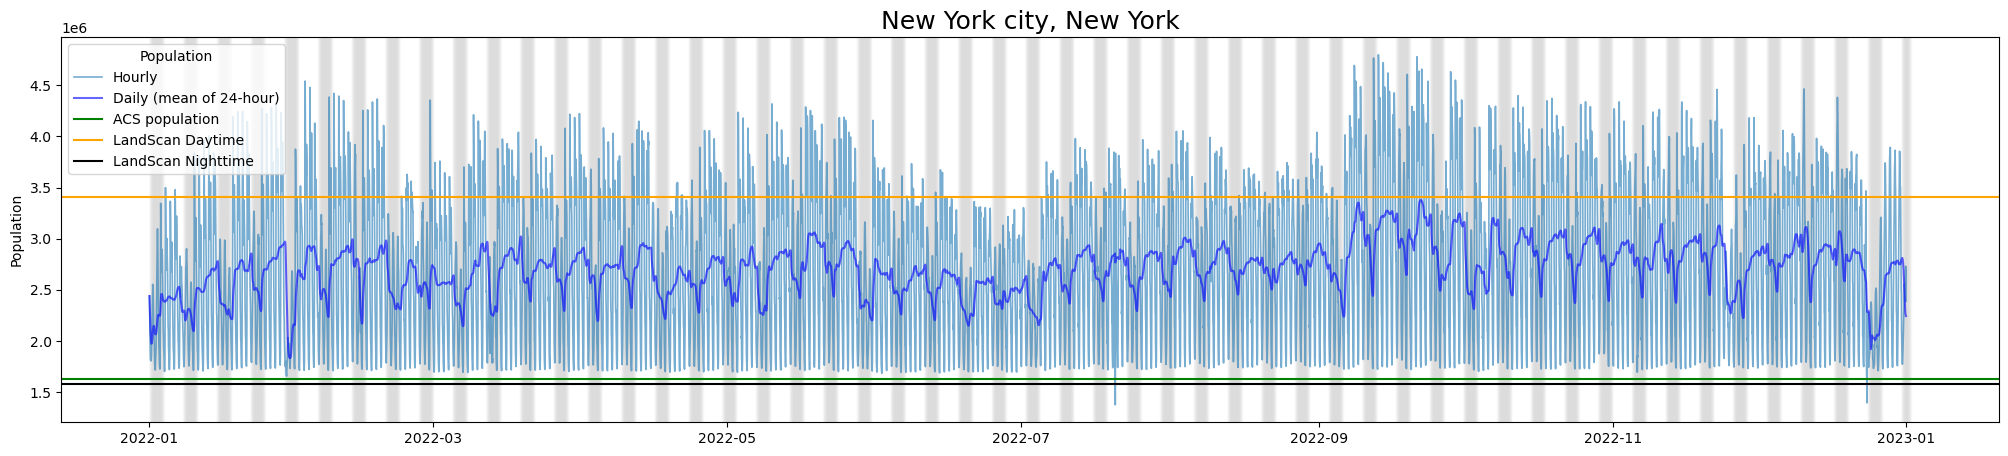

In [28]:
import matplotlib.pyplot as plt

def plot_population(df):
    fig, ax = plt.subplots(figsize = (25, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

    plt.plot(sum_series.iloc[3:], label="Hourly", alpha=0.6, linewidth=1.2)
    plt.plot(sum_series.iloc[3:].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=0.6)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 

    # grey weekends
    hourly_index = pd.date_range(start='2022-01-01', end='2022-12-31 23:00:00', freq='H')
    for start in hourly_index[hourly_index.weekday >= 5]:
        plt.axvspan(start, start + pd.Timedelta(days=1), color='gainsboro', alpha=0.02)

    saved_fname = os.path.join(save_path, 'place_plots',   f"{place_name}_{year}.png")  
    plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    plt.ylabel('Population')
    plt.legend(title='Population')
    # plt.savefig(saved_fname, dpi=300)
    # plt.close()
    plt.show()
 
plot_population(df)

In [89]:
STOP

NameError: name 'STOP' is not defined

## Show the map

In [ ]:
CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

In [ ]:
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12)


In [ ]:
CBG2019_gdf

In [379]:
year = 2022
month = 4
day = 9

hourly_index = pd.date_range(start=f'2022-{month:02}-{day:02}', end=f'2022-{month:02}-{day:02} 23:00:00', freq='H')
df = df.set_index('CBG')[hourly_index]
vmax = df.mean(axis=1).mean() + df.mean(axis=1).std() * 3
print("vmax:", vmax)
df

vmax: 17716.18901565814


,2022-04-09 00:00:00,2022-04-09 01:00:00,2022-04-09 02:00:00,2022-04-09 03:00:00,2022-04-09 04:00:00,2022-04-09 05:00:00,2022-04-09 06:00:00,2022-04-09 07:00:00,2022-04-09 08:00:00,2022-04-09 09:00:00,...,2022-04-09 14:00:00,2022-04-09 15:00:00,2022-04-09 16:00:00,2022-04-09 17:00:00,2022-04-09 18:00:00,2022-04-09 19:00:00,2022-04-09 20:00:00,2022-04-09 21:00:00,2022-04-09 22:00:00,2022-04-09 23:00:00
CBG,,,,,,,,,,,,,,,,,,,,,
450510503032,9649.0,6374.0,2915.0,2596.0,1857.0,2107.0,3355.0,5893.0,8432.0,9040.0,...,17883.0,20072.0,25287.0,26799.0,25320.0,25804.0,28086.0,31047.0,25473.0,14178.0
450510506002,9928.0,7264.0,4560.0,3618.0,2484.0,2738.0,2922.0,5415.0,7078.0,11346.0,...,207.6,207.6,207.6,207.6,207.6,3004.0,207.6,207.6,207.6,19159.0
450510507001,8294.0,4522.0,3647.0,2069.0,2310.0,1829.0,2417.0,2617.0,3640.0,7698.0,...,16528.0,25480.0,19480.0,17342.0,16405.0,23687.0,16908.0,15134.0,13875.0,6162.0
450510504011,1879.0,1431.0,1325.0,1601.0,1373.0,1388.0,1296.0,1602.0,2692.0,2651.0,...,1145.0,1486.0,2391.0,1694.0,2961.0,2944.0,3076.0,1621.0,2457.0,1403.0
450510504022,4193.0,3500.0,2234.0,1840.0,1205.0,845.0,734.0,698.0,1119.0,3188.0,...,5174.0,6237.0,8250.0,9948.0,10412.0,10470.0,11107.0,11030.0,7783.0,4568.0
450510505001,1174.0,1455.0,1533.0,1341.0,1526.0,1374.0,1557.0,992.0,776.0,819.0,...,413.0,149.0,46.0,307.0,149.0,149.7,410.0,225.0,620.0,971.0
450510505002,4982.0,2400.0,2473.0,1486.0,1643.0,1329.0,2117.0,3411.0,5440.0,9869.0,...,12261.0,14058.0,19206.0,19889.0,18400.0,21599.0,20027.0,17918.0,10133.0,5504.0
450510505003,6996.0,3346.0,2847.0,2176.0,2356.0,2684.0,7087.0,13596.0,22796.0,29660.0,...,220.4,3908.0,358.0,220.4,220.4,220.4,220.4,24489.0,13359.0,7439.0
450510506001,5368.0,4198.0,4212.0,3572.0,3574.0,3571.0,3967.0,5219.0,7021.0,12778.0,...,21248.0,20799.0,21180.0,18802.0,15337.0,11289.0,11122.0,7314.0,6084.0,5480.0


In [309]:
# df.index.astype(str).zfill(5

In [ ]:
merged_gdf = CBG2019_gdf.merge(df, left_on='CBG', right_index=True)
merged_gdf.plot()

In [ ]:
vmax = df.mean(axis=1).mean() + df.mean(axis=1).std() * 3
vmax
merged_gdf#.iloc[:, hour_column]

In [ ]:
place_name = "Manhattan, NY"
place_name = "State College, PA"
place_name = 'Myrtle Beach, SC'
place_name = 'Columbia, SC'
place_name = 'Ocean City, MD'

row_cnt = 3
col_cnt = 9


fig = plt.figure(figsize=(20, 7))
ax_idx = 0



cmap = 'viridis'
hour_column = 0

for row in range(1, row_cnt + 1):    
    for col in range(1, col_cnt + 1):   
        ax_idx += 1
        if col == (col_cnt):
            # print("skip: col = ", col)
            continue                  
        # print("row, col, ax_idx, hour_column:", row, col, ax_idx, hour_column)
        
        ax=fig.add_subplot(row_cnt, col_cnt, ax_idx)
        ax.axis('off')
        ax.set_title(f"{hour_column:02}:00:00")
        
        merged_gdf.plot(column=hourly_index[hour_column],  ax=ax, vmax=vmax, cmap=cmap) 
        
        hour_column = hour_column + 1
        
        if hour_column == 24:
            break
    if hour_column == 24:
        break    

ACS_LandScan_gdf = merged_gdf[['CBG', 'geometry']].merge(ACS_df.loc[df.index], left_on='CBG', right_index=True)

ax = fig.add_subplot(2, col_cnt,  9)
ax.axis('off')
ax.set_title(f"ACS 2019 Population")
ACS_popu_df = ACS_LandScan_gdf.plot(column='totalpopulation',  ax=ax, vmax=vmax, cmap=cmap)
new_position = [0.87, 0.55, 0.12, 0.33]  # [left, bottom, width, height]
ax.set_position(new_position)


# hourly population
ax = fig.add_subplot(2, col_cnt,  18)
# ax.axis('off')
hourly_popu_list = df.sum().to_list()
ax.plot(hourly_popu_list, label='hourly population')
ax.axhline(ACS_LandScan_gdf['totalpopulation'].sum(), color='red', label='ACS population')
ax.set_title('Hourly population')
ax.legend()
# ax3.set_aspect('auto')
new_position = [0.87, 0.15, 0.12, 0.33]  # [left, bottom, width, height]
ax.set_position(new_position)

# fig.subplots_adjust(right=1)  # Adjust the right margin
fig.suptitle(f"{place_name} Hourly Population ({year:04}-{month:02}-{day:02})", fontsize=20)


# Add colorbar axes at the bottom and align it with the left and right of the subplots
# pos1 = axs[0, 0].get_position() # get the original position for first axis
# pos2 = axs[-1, -1].get_position()
cax = fig.add_axes([0.07, 0.12, 0.007, 0.78])    # [left, bottom, width, height]  # bottom
value_max =vmax
value_min = 0

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
sm._A = []
# plt.colorbar(sm, cax=cax, label="Bias")
cbar = plt.colorbar(sm, cax=cax, orientation='vertical')

for t in cbar.ax.get_xticklabels():
    t.set_fontsize(16)

cbar.set_label('Population', labelpad=-60,   rotation=90, fontsize=14, loc='center')

png_name = os.path.join(save_path, f"{place_name.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_v4.png")

print("PNG name:", png_name)

plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
merged_gdf['geometry'].explore()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (25, 5))
sum_series = df.iloc[:, 8:].sum()

ACS_popu = sum_series.iloc[0]
sum_series = sum_series.mask(sum_series < 0, ACS_popu)

plt.plot(sum_series.iloc[1:])
plt.axhline(y =ACS_popu, color = 'r', linestyle = '-', lw=0.3) 

hourly_index = pd.date_range(start='2022-01-01', end='2022-12-31 23:00:00', freq='H')
for start in hourly_index[hourly_index.weekday >= 5]:
    plt.axvspan(start, start + pd.Timedelta(days=1), color='lightgrey', alpha=0.1)
    
sum_series

In [ ]:
sum_series.iloc[1:].rolling(window=24, min_periods=1).mean()

In [ ]:


# Given date
date_str = "2024-07-21"
date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d")

# Get the weekday name
weekday_name = calendar.day_name[date_obj.weekday()]

print(f"The date {date_str} is a {weekday_name}.")


In [ ]:
STOP

# Tools

# Creating the mapping between Places and Census block groups

In [ ]:
CBG_boundary_2019 = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\blockgoups\blockgoups2019.shp'
place_boundary_2019 = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\cb_2023_us_place_500k.zip"

In [ ]:
CBG_gdf = gpd.read_file(CBG_boundary_2019)
CBG_gdf

In [ ]:
place_gdf = gpd.read_file(place_boundary_2019)
place_gdf

In [ ]:
CBG_gdf['area_deg'] = CBG_gdf.area
CBG_gdf

In [ ]:
inter_gdf = CBG_gdf.overlay(place_gdf, how='intersection')
inter_gdf

In [ ]:
inter_gdf['sub_area_deg'] = inter_gdf.area
inter_gdf['sub_area_ratio'] = inter_gdf['sub_area_deg'] / inter_gdf['area_deg']

inter_gdf

In [ ]:
inter_gdf.query('sub_area_ratio > 0.5')

In [ ]:
saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\CBG_place.gpkg'
inter_gdf[['sub_area_ratio', 'GEOID_1', 'GEOID_2', 'NAME', 'NAMELSAD', 'STUSPS', 'STATE_NAME', 'geometry']].rename(columns={"GEOID_1":"CBG", "GEOID_2":"place"}).query('sub_area_ratio > 0.5').to_file(saved_fname, driver="GPKG")